# Algorithmic Trading Python for Beginners

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Importing and Pre-Processing Data

In [2]:
# Retrieve Apple from Yahoo Finance
Apple = yf.download("AAPL", start='2010-01-01', end='2021-01-01')
Apple

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473148,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370183,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358407,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400681,447610800
...,...,...,...,...,...,...
2020-12-24,131.320007,133.460007,131.100006,131.970001,129.339050,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,133.964966,124486200
2020-12-29,138.050003,138.789993,134.339996,134.869995,132.181229,121047300


In [3]:
# Obtain multiple stocks using a list
ticker = ["SPY", "AAPL", "KO"]
stocks = yf.download(ticker, start='2010-01-01', end='2021-01-01')
stocks

[*********************100%%**********************]  3 of 3 completed


Price        Adj Close                              Close             \
Ticker            AAPL         KO         SPY        AAPL         KO   
Date                                                                   
2010-01-04    6.461977  18.351233   86.860062    7.643214  28.520000   
2010-01-05    6.473148  18.129244   87.090004    7.656429  28.174999   
2010-01-06    6.370183  18.122808   87.151299    7.534643  28.165001   
2010-01-07    6.358407  18.077759   87.519196    7.520714  28.094999   
2010-01-08    6.400681  17.743174   87.810448    7.570714  27.575001   
...                ...        ...         ...         ...        ...   
2020-12-24  129.339050  48.392036  351.874786  131.970001  53.439999   
2020-12-28  133.964966  49.044022  354.897614  136.690002  54.160000   
2020-12-29  132.181229  49.016865  354.220551  134.869995  54.130001   
2020-12-30  131.054153  49.297581  354.725922  133.720001  54.439999   
2020-12-31  130.044647  49.659794  356.528229  132.690002  54.840000   

Price                         High                                Low  \
Ticker             SPY        AAPL         KO         SPY        AAPL   
Date                                                                    
2010-01-04  113.330002    7.660714  28.610001  113.389999    7.585000   
2010-01-05  113.629997    7.699643  28.495001  113.680000    7.616071   
2010-01-06  113.709999    7.686786  28.219999  113.989998    7.526786   
2010-01-07  114.190002    7.571429  28.184999  114.330002    7.466071   
2010-01-08  114.570000    7.571429  27.820000  114.620003    7.466429   
...                ...         ...        ...         ...         ...   
2020-12-24  369.000000  133.460007  53.549999  369.029999  131.100006   
2020-12-28  372.170013  137.339996  54.439999  372.589996  133.509995   
2020-12-29  371.459991  138.789993  54.490002  374.000000  134.339996   
2020-12-30  371.989990  135.990005  54.630001  373.100006  133.399994   
2020-12-31  373.880005  134.740005  54.930000  374.660004  131.720001   

Price                                    Open                         \
Ticker             KO         SPY        AAPL         KO         SPY   
Date                                                                   
2010-01-04  28.450001  111.510002    7.622500  28.580000  112.370003   
2010-01-05  28.070000  112.849998    7.664286  28.424999  113.260002   
2010-01-06  27.990000  113.430000    7.656429  28.174999  113.519997   
2010-01-07  27.875000  113.180000    7.562500  28.165001  113.500000   
2010-01-08  27.375000  113.660004    7.510714  27.730000  113.889999   
...               ...         ...         ...        ...         ...   
2020-12-24  53.020000  367.450012  131.320007  53.020000  368.079987   
2020-12-28  53.730000  371.070007  133.990005  53.849998  371.739990   
2020-12-29  54.020000  370.829987  138.050003  54.450001  373.809998   
2020-12-30  54.029999  371.570007  135.580002  54.049999  372.339996   
2020-12-31  54.270000  371.230011  134.080002  54.450001  371.779999   

Price          Volume                       
Ticker           AAPL        KO        SPY  
Date                                        
2010-01-04  493729600  13870400  118944600  
2010-01-05  601904800  23172400  111579900  
2010-01-06  552160000  19264600  116074400  
2010-01-07  477131200  13234600  131091100  
2010-01-08  447610800  28712400  126402800  
...               ...       ...        ...  
2020-12-24   54930100   3265500   26457900  
2020-12-28  124486200   9020500   39000400  
2020-12-29  121047300   8320600   53680500  
2020-12-30   96452100   8142700   49455300  
2020-12-31   99116600   8495000   78520700  

[2769 rows x 18 columns]

In [4]:
# Print top five
stocks.head()

Price      Adj Close                           Close                         \
Ticker          AAPL         KO        SPY      AAPL         KO         SPY   
Date                                                                          
2010-01-04  6.461977  18.351233  86.860062  7.643214  28.520000  113.330002   
2010-01-05  6.473148  18.129244  87.090004  7.656429  28.174999  113.629997   
2010-01-06  6.370183  18.122808  87.151299  7.534643  28.165001  113.709999   
2010-01-07  6.358407  18.077759  87.519196  7.520714  28.094999  114.190002   
2010-01-08  6.400681  17.743174  87.810448  7.570714  27.575001  114.570000   

Price           High                              Low                         \
Ticker          AAPL         KO         SPY      AAPL         KO         SPY   
Date                                                                           
2010-01-04  7.660714  28.610001  113.389999  7.585000  28.450001  111.510002   
2010-01-05  7.699643  28.495001  113.680000  7.616071  28.070000  112.849998   
2010-01-06  7.686786  28.219999  113.989998  7.526786  27.990000  113.430000   
2010-01-07  7.571429  28.184999  114.330002  7.466071  27.875000  113.180000   
2010-01-08  7.571429  27.820000  114.620003  7.466429  27.375000  113.660004   

Price           Open                            Volume                       
Ticker          AAPL         KO         SPY       AAPL        KO        SPY  
Date                                                                         
2010-01-04  7.622500  28.580000  112.370003  493729600  13870400  118944600  
2010-01-05  7.664286  28.424999  113.260002  601904800  23172400  111579900  
2010-01-06  7.656429  28.174999  113.519997  552160000  19264600  116074400  
2010-01-07  7.562500  28.165001  113.500000  477131200  13234600  131091100  
2010-01-08  7.510714  27.730000  113.889999  447610800  28712400  126402800

In [5]:
# Print bottom five
stocks.tail()

Price        Adj Close                              Close             \
Ticker            AAPL         KO         SPY        AAPL         KO   
Date                                                                   
2020-12-24  129.339050  48.392036  351.874786  131.970001  53.439999   
2020-12-28  133.964966  49.044022  354.897614  136.690002  54.160000   
2020-12-29  132.181229  49.016865  354.220551  134.869995  54.130001   
2020-12-30  131.054153  49.297581  354.725922  133.720001  54.439999   
2020-12-31  130.044647  49.659794  356.528229  132.690002  54.840000   

Price                         High                                Low  \
Ticker             SPY        AAPL         KO         SPY        AAPL   
Date                                                                    
2020-12-24  369.000000  133.460007  53.549999  369.029999  131.100006   
2020-12-28  372.170013  137.339996  54.439999  372.589996  133.509995   
2020-12-29  371.459991  138.789993  54.490002  374.000000  134.339996   
2020-12-30  371.989990  135.990005  54.630001  373.100006  133.399994   
2020-12-31  373.880005  134.740005  54.930000  374.660004  131.720001   

Price                                    Open                         \
Ticker             KO         SPY        AAPL         KO         SPY   
Date                                                                   
2020-12-24  53.020000  367.450012  131.320007  53.020000  368.079987   
2020-12-28  53.730000  371.070007  133.990005  53.849998  371.739990   
2020-12-29  54.020000  370.829987  138.050003  54.450001  373.809998   
2020-12-30  54.029999  371.570007  135.580002  54.049999  372.339996   
2020-12-31  54.270000  371.230011  134.080002  54.450001  371.779999   

Price          Volume                     
Ticker           AAPL       KO       SPY  
Date                                      
2020-12-24   54930100  3265500  26457900  
2020-12-28  124486200  9020500  39000400  
2020-12-29  121047300  8320600  53680500  
2020-12-30   96452100  8142700  49455300  
2020-12-31   99116600  8495000  78520700

In [6]:
# Print general info about stocks
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2769 entries, 2010-01-04 to 2020-12-31
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  2769 non-null   float64
 1   (Adj Close, KO)    2769 non-null   float64
 2   (Adj Close, SPY)   2769 non-null   float64
 3   (Close, AAPL)      2769 non-null   float64
 4   (Close, KO)        2769 non-null   float64
 5   (Close, SPY)       2769 non-null   float64
 6   (High, AAPL)       2769 non-null   float64
 7   (High, KO)         2769 non-null   float64
 8   (High, SPY)        2769 non-null   float64
 9   (Low, AAPL)        2769 non-null   float64
 10  (Low, KO)          2769 non-null   float64
 11  (Low, SPY)         2769 non-null   float64
 12  (Open, AAPL)       2769 non-null   float64
 13  (Open, KO)         2769 non-null   float64
 14  (Open, SPY)        2769 non-null   float64
 15  (Volume, AAPL)     2769 non-null   int64  
 16  (Volum

In [7]:
# Export stocks into .csv and import it back
stocks.to_csv("stocksYT.csv")
stocks = pd.read_csv("stocksYT.csv")
stocks

,Price,Adj Close,Adj Close.1,Adj Close.2,Close,Close.1,Close.2,High,High.1,High.2,Low,Low.1,Low.2,Open,Open.1,Open.2,Volume,Volume.1,Volume.2
0,Ticker,AAPL,KO,SPY,AAPL,KO,SPY,AAPL,KO,SPY,AAPL,KO,SPY,AAPL,KO,SPY,AAPL,KO,SPY
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-04,6.461977005004883,18.351232528686523,86.86006164550781,7.643214225769043,28.520000457763672,113.33000183105469,7.660714149475098,28.610000610351562,113.38999938964844,7.585000038146973,28.450000762939453,111.51000213623047,7.622499942779541,28.579999923706055,112.37000274658203,493729600,13870400,118944600
3,2010-01-05,6.473148345947266,18.129243850708008,87.09000396728516,7.656428813934326,28.174999237060547,113.62999725341797,7.699643135070801,28.4950008392334,113.68000030517578,7.6160712242126465,28.06999969482422,112.8499984741211,7.664286136627197,28.424999237060547,113.26000213623047,601904800,23172400,111579900
4,2010-01-06,6.37018346786499,18.1228084564209,87.15129852294922,7.534643173217773,28.165000915527344,113.70999908447266,7.68678617477417,28.219999313354492,113.98999786376953,7.526785850524902,27.989999771118164,113.43000030517578,7.656428813934326,28.174999237060547,113.5199966430664,552160000,19264600,116074400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2766,2020-12-24,129.33905029296875,48.39203643798828,351.8747863769531,131.97000122070312,53.439998626708984,369.0,133.4600067138672,53.54999923706055,369.0299987792969,131.10000610351562,53.02000045776367,367.45001220703125,131.32000732421875,53.02000045776367,368.0799865722656,54930100,3265500,26457900
2767,2020-12-28,133.9649658203125,49.04402160644531,354.8976135253906,136.69000244140625,54.15999984741211,372.1700134277344,137.33999633789062,54.439998626708984,372.5899963378906,133.50999450683594,53.72999954223633,371.07000732421875,133.99000549316406,53.849998474121094,371.739990234375,124486200,9020500,39000400
2768,2020-12-29,132.1812286376953,49.01686477661133,354.2205505371094,134.8699951171875,54.130001068115234,371.4599914550781,138.7899932861328,54.4900016784668,374.0,134.33999633789062,54.02000045776367,370.8299865722656,138.0500030517578,54.45000076293945,373.80999755859375,121047300,8320600,53680500
2769,2020-12-30,131.0541534423828,49.29758071899414,354.7259216308594,133.72000122070312,54.439998626708984,371.989990234375,135.99000549316406,54.630001068115234,373.1000061035156,133.39999389648438,54.029998779296875,371.57000732421875,135.5800018310547,54.04999923706055,372.3399963378906,96452100,8142700,49455300


In [8]:
# Set first two rows as the headers
stocks = pd.read_csv("stocksYT.csv", header=[0,1])
stocks

Price   Adj Close                              Close             \
          Ticker        AAPL         KO         SPY        AAPL         KO   
0           Date         NaN        NaN         NaN         NaN        NaN   
1     2010-01-04    6.461977  18.351233   86.860062    7.643214  28.520000   
2     2010-01-05    6.473148  18.129244   87.090004    7.656429  28.174999   
3     2010-01-06    6.370183  18.122808   87.151299    7.534643  28.165001   
4     2010-01-07    6.358407  18.077759   87.519196    7.520714  28.094999   
...          ...         ...        ...         ...         ...        ...   
2765  2020-12-24  129.339050  48.392036  351.874786  131.970001  53.439999   
2766  2020-12-28  133.964966  49.044022  354.897614  136.690002  54.160000   
2767  2020-12-29  132.181229  49.016865  354.220551  134.869995  54.130001   
2768  2020-12-30  131.054153  49.297581  354.725922  133.720001  54.439999   
2769  2020-12-31  130.044647  49.659794  356.528229  132.690002  54.840000   

                        High                                Low             \
             SPY        AAPL         KO         SPY        AAPL         KO   
0            NaN         NaN        NaN         NaN         NaN        NaN   
1     113.330002    7.660714  28.610001  113.389999    7.585000  28.450001   
2     113.629997    7.699643  28.495001  113.680000    7.616071  28.070000   
3     113.709999    7.686786  28.219999  113.989998    7.526786  27.990000   
4     114.190002    7.571429  28.184999  114.330002    7.466071  27.875000   
...          ...         ...        ...         ...         ...        ...   
2765  369.000000  133.460007  53.549999  369.029999  131.100006  53.020000   
2766  372.170013  137.339996  54.439999  372.589996  133.509995  53.730000   
2767  371.459991  138.789993  54.490002  374.000000  134.339996  54.020000   
2768  371.989990  135.990005  54.630001  373.100006  133.399994  54.029999   
2769  373.880005  134.740005  54.930000  374.660004  131.720001  54.270000   

                        Open                              Volume              \
             SPY        AAPL         KO         SPY         AAPL          KO   
0            NaN         NaN        NaN         NaN          NaN         NaN   
1     111.510002    7.622500  28.580000  112.370003  493729600.0  13870400.0   
2     112.849998    7.664286  28.424999  113.260002  601904800.0  23172400.0   
3     113.430000    7.656429  28.174999  113.519997  552160000.0  19264600.0   
4     113.180000    7.562500  28.165001  113.500000  477131200.0  13234600.0   
...          ...         ...        ...         ...          ...         ...   
2765  367.450012  131.320007  53.020000  368.079987   54930100.0   3265500.0   
2766  371.070007  133.990005  53.849998  371.739990  124486200.0   9020500.0   
2767  370.829987  138.050003  54.450001  373.809998  121047300.0   8320600.0   
2768  371.570007  135.580002  54.049999  372.339996   96452100.0   8142700.0   
2769  371.230011  134.080002  54.450001  371.779999   99116600.0   8495000.0   

                   
              SPY  
0             NaN  
1     118944600.0  
2     111579900.0  
3     116074400.0  
4     131091100.0  
...           ...  
2765   26457900.0  
2766   39000400.0  
2767   53680500.0  
2768   49455300.0  
2769   78520700.0  

[2770 rows x 19 columns]

In [9]:
# Set first column as the index of the data frame
stocks = pd.read_csv("stocksYT.csv", header=[0,1], index_col=[0])
stocks

Price        Adj Close                              Close             \
Ticker            AAPL         KO         SPY        AAPL         KO   
Date                                                                   
2010-01-04    6.461977  18.351233   86.860062    7.643214  28.520000   
2010-01-05    6.473148  18.129244   87.090004    7.656429  28.174999   
2010-01-06    6.370183  18.122808   87.151299    7.534643  28.165001   
2010-01-07    6.358407  18.077759   87.519196    7.520714  28.094999   
2010-01-08    6.400681  17.743174   87.810448    7.570714  27.575001   
...                ...        ...         ...         ...        ...   
2020-12-24  129.339050  48.392036  351.874786  131.970001  53.439999   
2020-12-28  133.964966  49.044022  354.897614  136.690002  54.160000   
2020-12-29  132.181229  49.016865  354.220551  134.869995  54.130001   
2020-12-30  131.054153  49.297581  354.725922  133.720001  54.439999   
2020-12-31  130.044647  49.659794  356.528229  132.690002  54.840000   

Price                         High                                Low  \
Ticker             SPY        AAPL         KO         SPY        AAPL   
Date                                                                    
2010-01-04  113.330002    7.660714  28.610001  113.389999    7.585000   
2010-01-05  113.629997    7.699643  28.495001  113.680000    7.616071   
2010-01-06  113.709999    7.686786  28.219999  113.989998    7.526786   
2010-01-07  114.190002    7.571429  28.184999  114.330002    7.466071   
2010-01-08  114.570000    7.571429  27.820000  114.620003    7.466429   
...                ...         ...        ...         ...         ...   
2020-12-24  369.000000  133.460007  53.549999  369.029999  131.100006   
2020-12-28  372.170013  137.339996  54.439999  372.589996  133.509995   
2020-12-29  371.459991  138.789993  54.490002  374.000000  134.339996   
2020-12-30  371.989990  135.990005  54.630001  373.100006  133.399994   
2020-12-31  373.880005  134.740005  54.930000  374.660004  131.720001   

Price                                    Open                         \
Ticker             KO         SPY        AAPL         KO         SPY   
Date                                                                   
2010-01-04  28.450001  111.510002    7.622500  28.580000  112.370003   
2010-01-05  28.070000  112.849998    7.664286  28.424999  113.260002   
2010-01-06  27.990000  113.430000    7.656429  28.174999  113.519997   
2010-01-07  27.875000  113.180000    7.562500  28.165001  113.500000   
2010-01-08  27.375000  113.660004    7.510714  27.730000  113.889999   
...               ...         ...         ...        ...         ...   
2020-12-24  53.020000  367.450012  131.320007  53.020000  368.079987   
2020-12-28  53.730000  371.070007  133.990005  53.849998  371.739990   
2020-12-29  54.020000  370.829987  138.050003  54.450001  373.809998   
2020-12-30  54.029999  371.570007  135.580002  54.049999  372.339996   
2020-12-31  54.270000  371.230011  134.080002  54.450001  371.779999   

Price          Volume                       
Ticker           AAPL        KO        SPY  
Date                                        
2010-01-04  493729600  13870400  118944600  
2010-01-05  601904800  23172400  111579900  
2010-01-06  552160000  19264600  116074400  
2010-01-07  477131200  13234600  131091100  
2010-01-08  447610800  28712400  126402800  
...               ...       ...        ...  
2020-12-24   54930100   3265500   26457900  
2020-12-28  124486200   9020500   39000400  
2020-12-29  121047300   8320600   53680500  
2020-12-30   96452100   8142700   49455300  
2020-12-31   99116600   8495000   78520700  

[2769 rows x 18 columns]

![](/Users/jooyoungoh/Pictures/Screenshots/column-indexing.png)

In [10]:
# Parse the `Date` column into datetime objects
stocks = pd.read_csv("stocksYT.csv", header=[0,1], index_col=[0], parse_dates=[0])
stocks

Price        Adj Close                              Close             \
Ticker            AAPL         KO         SPY        AAPL         KO   
Date                                                                   
2010-01-04    6.461977  18.351233   86.860062    7.643214  28.520000   
2010-01-05    6.473148  18.129244   87.090004    7.656429  28.174999   
2010-01-06    6.370183  18.122808   87.151299    7.534643  28.165001   
2010-01-07    6.358407  18.077759   87.519196    7.520714  28.094999   
2010-01-08    6.400681  17.743174   87.810448    7.570714  27.575001   
...                ...        ...         ...         ...        ...   
2020-12-24  129.339050  48.392036  351.874786  131.970001  53.439999   
2020-12-28  133.964966  49.044022  354.897614  136.690002  54.160000   
2020-12-29  132.181229  49.016865  354.220551  134.869995  54.130001   
2020-12-30  131.054153  49.297581  354.725922  133.720001  54.439999   
2020-12-31  130.044647  49.659794  356.528229  132.690002  54.840000   

Price                         High                                Low  \
Ticker             SPY        AAPL         KO         SPY        AAPL   
Date                                                                    
2010-01-04  113.330002    7.660714  28.610001  113.389999    7.585000   
2010-01-05  113.629997    7.699643  28.495001  113.680000    7.616071   
2010-01-06  113.709999    7.686786  28.219999  113.989998    7.526786   
2010-01-07  114.190002    7.571429  28.184999  114.330002    7.466071   
2010-01-08  114.570000    7.571429  27.820000  114.620003    7.466429   
...                ...         ...        ...         ...         ...   
2020-12-24  369.000000  133.460007  53.549999  369.029999  131.100006   
2020-12-28  372.170013  137.339996  54.439999  372.589996  133.509995   
2020-12-29  371.459991  138.789993  54.490002  374.000000  134.339996   
2020-12-30  371.989990  135.990005  54.630001  373.100006  133.399994   
2020-12-31  373.880005  134.740005  54.930000  374.660004  131.720001   

Price                                    Open                         \
Ticker             KO         SPY        AAPL         KO         SPY   
Date                                                                   
2010-01-04  28.450001  111.510002    7.622500  28.580000  112.370003   
2010-01-05  28.070000  112.849998    7.664286  28.424999  113.260002   
2010-01-06  27.990000  113.430000    7.656429  28.174999  113.519997   
2010-01-07  27.875000  113.180000    7.562500  28.165001  113.500000   
2010-01-08  27.375000  113.660004    7.510714  27.730000  113.889999   
...               ...         ...         ...        ...         ...   
2020-12-24  53.020000  367.450012  131.320007  53.020000  368.079987   
2020-12-28  53.730000  371.070007  133.990005  53.849998  371.739990   
2020-12-29  54.020000  370.829987  138.050003  54.450001  373.809998   
2020-12-30  54.029999  371.570007  135.580002  54.049999  372.339996   
2020-12-31  54.270000  371.230011  134.080002  54.450001  371.779999   

Price          Volume                       
Ticker           AAPL        KO        SPY  
Date                                        
2010-01-04  493729600  13870400  118944600  
2010-01-05  601904800  23172400  111579900  
2010-01-06  552160000  19264600  116074400  
2010-01-07  477131200  13234600  131091100  
2010-01-08  447610800  28712400  126402800  
...               ...       ...        ...  
2020-12-24   54930100   3265500   26457900  
2020-12-28  124486200   9020500   39000400  
2020-12-29  121047300   8320600   53680500  
2020-12-30   96452100   8142700   49455300  
2020-12-31   99116600   8495000   78520700  

[2769 rows x 18 columns]

In [11]:
# Print column names
stocks.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close',   'KO'),
            ('Adj Close',  'SPY'),
            (    'Close', 'AAPL'),
            (    'Close',   'KO'),
            (    'Close',  'SPY'),
            (     'High', 'AAPL'),
            (     'High',   'KO'),
            (     'High',  'SPY'),
            (      'Low', 'AAPL'),
            (      'Low',   'KO'),
            (      'Low',  'SPY'),
            (     'Open', 'AAPL'),
            (     'Open',   'KO'),
            (     'Open',  'SPY'),
            (   'Volume', 'AAPL'),
            (   'Volume',   'KO'),
            (   'Volume',  'SPY')],
           names=['Price', 'Ticker'])

In [12]:
# Convert the multi-index into one tuple
stocks.columns = stocks.columns.to_flat_index()
stocks.columns

Index([('Adj Close', 'AAPL'),   ('Adj Close', 'KO'),  ('Adj Close', 'SPY'),
           ('Close', 'AAPL'),       ('Close', 'KO'),      ('Close', 'SPY'),
            ('High', 'AAPL'),        ('High', 'KO'),       ('High', 'SPY'),
             ('Low', 'AAPL'),         ('Low', 'KO'),        ('Low', 'SPY'),
            ('Open', 'AAPL'),        ('Open', 'KO'),       ('Open', 'SPY'),
          ('Volume', 'AAPL'),      ('Volume', 'KO'),     ('Volume', 'SPY')],
      dtype='object')

In [13]:
stocks

,"(Adj Close, AAPL)","(Adj Close, KO)","(Adj Close, SPY)","(Close, AAPL)","(Close, KO)","(Close, SPY)","(High, AAPL)","(High, KO)","(High, SPY)","(Low, AAPL)","(Low, KO)","(Low, SPY)","(Open, AAPL)","(Open, KO)","(Open, SPY)","(Volume, AAPL)","(Volume, KO)","(Volume, SPY)"
Date,,,,,,,,,,,,,,,,,,
2010-01-04,6.461977,18.351233,86.860062,7.643214,28.520000,113.330002,7.660714,28.610001,113.389999,7.585000,28.450001,111.510002,7.622500,28.580000,112.370003,493729600,13870400,118944600
2010-01-05,6.473148,18.129244,87.090004,7.656429,28.174999,113.629997,7.699643,28.495001,113.680000,7.616071,28.070000,112.849998,7.664286,28.424999,113.260002,601904800,23172400,111579900
2010-01-06,6.370183,18.122808,87.151299,7.534643,28.165001,113.709999,7.686786,28.219999,113.989998,7.526786,27.990000,113.430000,7.656429,28.174999,113.519997,552160000,19264600,116074400
2010-01-07,6.358407,18.077759,87.519196,7.520714,28.094999,114.190002,7.571429,28.184999,114.330002,7.466071,27.875000,113.180000,7.562500,28.165001,113.500000,477131200,13234600,131091100
2010-01-08,6.400681,17.743174,87.810448,7.570714,27.575001,114.570000,7.571429,27.820000,114.620003,7.466429,27.375000,113.660004,7.510714,27.730000,113.889999,447610800,28712400,126402800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,129.339050,48.392036,351.874786,131.970001,53.439999,369.000000,133.460007,53.549999,369.029999,131.100006,53.020000,367.450012,131.320007,53.020000,368.079987,54930100,3265500,26457900
2020-12-28,133.964966,49.044022,354.897614,136.690002,54.160000,372.170013,137.339996,54.439999,372.589996,133.509995,53.730000,371.070007,133.990005,53.849998,371.739990,124486200,9020500,39000400
2020-12-29,132.181229,49.016865,354.220551,134.869995,54.130001,371.459991,138.789993,54.490002,374.000000,134.339996,54.020000,370.829987,138.050003,54.450001,373.809998,121047300,8320600,53680500


<img src="/Users/jooyoungoh/Pictures/Screenshots/Screenshot 2024-06-01 at 4.49.45 PM.png"/>

In [14]:
stocks.columns = pd.MultiIndex.from_tuples(stocks.columns)
stocks

Adj Close                              Close             \
                  AAPL         KO         SPY        AAPL         KO   
Date                                                                   
2010-01-04    6.461977  18.351233   86.860062    7.643214  28.520000   
2010-01-05    6.473148  18.129244   87.090004    7.656429  28.174999   
2010-01-06    6.370183  18.122808   87.151299    7.534643  28.165001   
2010-01-07    6.358407  18.077759   87.519196    7.520714  28.094999   
2010-01-08    6.400681  17.743174   87.810448    7.570714  27.575001   
...                ...        ...         ...         ...        ...   
2020-12-24  129.339050  48.392036  351.874786  131.970001  53.439999   
2020-12-28  133.964966  49.044022  354.897614  136.690002  54.160000   
2020-12-29  132.181229  49.016865  354.220551  134.869995  54.130001   
2020-12-30  131.054153  49.297581  354.725922  133.720001  54.439999   
2020-12-31  130.044647  49.659794  356.528229  132.690002  54.840000   

                              High                                Low  \
                   SPY        AAPL         KO         SPY        AAPL   
Date                                                                    
2010-01-04  113.330002    7.660714  28.610001  113.389999    7.585000   
2010-01-05  113.629997    7.699643  28.495001  113.680000    7.616071   
2010-01-06  113.709999    7.686786  28.219999  113.989998    7.526786   
2010-01-07  114.190002    7.571429  28.184999  114.330002    7.466071   
2010-01-08  114.570000    7.571429  27.820000  114.620003    7.466429   
...                ...         ...        ...         ...         ...   
2020-12-24  369.000000  133.460007  53.549999  369.029999  131.100006   
2020-12-28  372.170013  137.339996  54.439999  372.589996  133.509995   
2020-12-29  371.459991  138.789993  54.490002  374.000000  134.339996   
2020-12-30  371.989990  135.990005  54.630001  373.100006  133.399994   
2020-12-31  373.880005  134.740005  54.930000  374.660004  131.720001   

                                         Open                         \
                   KO         SPY        AAPL         KO         SPY   
Date                                                                   
2010-01-04  28.450001  111.510002    7.622500  28.580000  112.370003   
2010-01-05  28.070000  112.849998    7.664286  28.424999  113.260002   
2010-01-06  27.990000  113.430000    7.656429  28.174999  113.519997   
2010-01-07  27.875000  113.180000    7.562500  28.165001  113.500000   
2010-01-08  27.375000  113.660004    7.510714  27.730000  113.889999   
...               ...         ...         ...        ...         ...   
2020-12-24  53.020000  367.450012  131.320007  53.020000  368.079987   
2020-12-28  53.730000  371.070007  133.990005  53.849998  371.739990   
2020-12-29  54.020000  370.829987  138.050003  54.450001  373.809998   
2020-12-30  54.029999  371.570007  135.580002  54.049999  372.339996   
2020-12-31  54.270000  371.230011  134.080002  54.450001  371.779999   

               Volume                       
                 AAPL        KO        SPY  
Date                                        
2010-01-04  493729600  13870400  118944600  
2010-01-05  601904800  23172400  111579900  
2010-01-06  552160000  19264600  116074400  
2010-01-07  477131200  13234600  131091100  
2010-01-08  447610800  28712400  126402800  
...               ...       ...        ...  
2020-12-24   54930100   3265500   26457900  
2020-12-28  124486200   9020500   39000400  
2020-12-29  121047300   8320600   53680500  
2020-12-30   96452100   8142700   49455300  
2020-12-31   99116600   8495000   78520700  

[2769 rows x 18 columns]

# 2. Describing the Data

In [15]:
stocks.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close',   'KO'),
            ('Adj Close',  'SPY'),
            (    'Close', 'AAPL'),
            (    'Close',   'KO'),
            (    'Close',  'SPY'),
            (     'High', 'AAPL'),
            (     'High',   'KO'),
            (     'High',  'SPY'),
            (      'Low', 'AAPL'),
            (      'Low',   'KO'),
            (      'Low',  'SPY'),
            (     'Open', 'AAPL'),
            (     'Open',   'KO'),
            (     'Open',  'SPY'),
            (   'Volume', 'AAPL'),
            (   'Volume',   'KO'),
            (   'Volume',  'SPY')],
           )

In [16]:
# Return the count, mean, stdev, etc.
stocks.describe()

Adj Close                                  Close               \
              AAPL           KO          SPY         AAPL           KO   
count  2769.000000  2769.000000  2769.000000  2769.000000  2769.000000   
mean     31.479645    31.953174   181.488474    33.777537    41.320121   
std      24.550125     8.118785    69.487675    24.572747     6.808527   
min       5.798900    16.243893    79.026405     6.858929    25.014999   
25%      15.161382    26.394421   114.525398    17.484285    37.660000   
50%      24.484756    31.516825   175.436020    26.987499    41.759998   
75%      40.824097    37.329926   241.183334    43.007500    45.549999   
max     133.964966    52.648422   356.528229   136.690002    60.130001   

                           High                                    Low  \
               SPY         AAPL           KO          SPY         AAPL   
count  2769.000000  2769.000000  2769.000000  2769.000000  2769.000000   
mean    207.676797    34.114230    41.583236   208.716963    33.413543   
std      67.240791    24.895185     6.864731    67.589965    24.220789   
min     102.199997     7.000000    25.150000   103.419998     6.794643   
25%     141.559998    17.695356    37.919998   142.100006    17.333929   
50%     205.210007    27.225000    41.980000   206.190002    26.705000   
75%     265.339996    43.367500    45.799999   267.320007    42.605000   
max     373.880005   138.789993    60.130001   378.459991   134.339996   

                                        Open                            \
                KO          SPY         AAPL           KO          SPY   
count  2769.000000  2769.000000  2769.000000  2769.000000  2769.000000   
mean     41.042551   206.475522    33.764375    41.314411   207.648136   
std       6.755616    66.883703    24.561595     6.807492    67.258092   
min      24.735001   101.129997     6.870357    25.110001   103.110001   
25%      37.419998   140.929993    17.518213    37.700001   141.660004   
50%      41.529999   204.110001    26.975000    41.750000   204.960007   
75%      45.310001   263.390015    43.012501    45.549999   265.779999   
max      59.619999   371.570007   138.050003    59.810001   373.809998   

             Volume                              
               AAPL            KO           SPY  
count  2.769000e+03  2.769000e+03  2.769000e+03  
mean   2.866162e+08  1.502133e+07  1.244573e+08  
std    2.289459e+08  6.716946e+06  7.477756e+07  
min    4.544800e+07  2.996300e+06  2.027000e+07  
25%    1.211120e+08  1.071810e+07  7.292670e+07  
50%    2.029972e+08  1.350830e+07  1.045961e+08  
75%    3.890376e+08  1.751480e+07  1.539926e+08  
max    1.880998e+09  9.896750e+07  7.178287e+08

In [17]:
# Return specified rows and columns of a data frame
stocks.loc[:,"Close"]

,AAPL,KO,SPY
Date,,,
2010-01-04,7.643214,28.520000,113.330002
2010-01-05,7.656429,28.174999,113.629997
2010-01-06,7.534643,28.165001,113.709999
2010-01-07,7.520714,28.094999,114.190002
2010-01-08,7.570714,27.575001,114.570000
...,...,...,...
2020-12-24,131.970001,53.439999,369.000000
2020-12-28,136.690002,54.160000,372.170013
2020-12-29,134.869995,54.130001,371.459991


In [18]:
# We create an independent copy of the "Close" column using close().
# While it might seem suffice to assign it to 'close', it'd be just a view of the original data set.
close = stocks.loc[:, "Close"].copy()
close

,AAPL,KO,SPY
Date,,,
2010-01-04,7.643214,28.520000,113.330002
2010-01-05,7.656429,28.174999,113.629997
2010-01-06,7.534643,28.165001,113.709999
2010-01-07,7.520714,28.094999,114.190002
2010-01-08,7.570714,27.575001,114.570000
...,...,...,...
2020-12-24,131.970001,53.439999,369.000000
2020-12-28,136.690002,54.160000,372.170013
2020-12-29,134.869995,54.130001,371.459991


In [19]:
# Configure Jupyter to display plots inline
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

<function matplotlib.pyplot.show(close=None, block=None)>

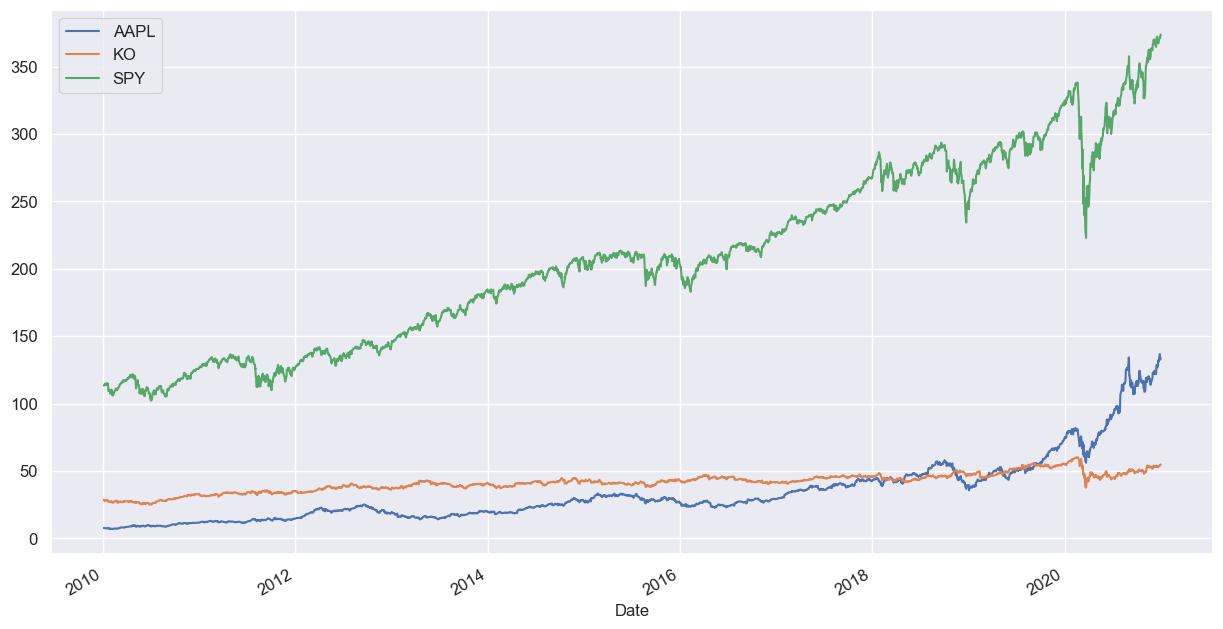

In [20]:
close.plot(figsize=(15,8), fontsize=12)
plt.legend(fontsize=12)
plt.show

In [21]:
# We will now normalize the data for comparison
close.iloc[0,0]

7.643214225769043

In [22]:
close.AAPL

Date
2010-01-04      7.643214
2010-01-05      7.656429
2010-01-06      7.534643
2010-01-07      7.520714
2010-01-08      7.570714
                 ...    
2020-12-24    131.970001
2020-12-28    136.690002
2020-12-29    134.869995
2020-12-30    133.720001
2020-12-31    132.690002
Name: AAPL, Length: 2769, dtype: float64

In [23]:
close.AAPL.div(close.iloc[0,0])

Date
2010-01-04     1.000000
2010-01-05     1.001729
2010-01-06     0.985795
2010-01-07     0.983973
2010-01-08     0.990514
                ...    
2020-12-24    17.266296
2020-12-28    17.883838
2020-12-29    17.645717
2020-12-30    17.495258
2020-12-31    17.360498
Name: AAPL, Length: 2769, dtype: float64

In [24]:
close.AAPL.div(close.iloc[0,0]).mul(100)

Date
2010-01-04     100.000000
2010-01-05     100.172893
2010-01-06      98.579511
2010-01-07      98.397266
2010-01-08      99.051443
                 ...     
2020-12-24    1726.629626
2020-12-28    1788.383766
2020-12-29    1764.571699
2020-12-30    1749.525753
2020-12-31    1736.049763
Name: AAPL, Length: 2769, dtype: float64

In [25]:
close.iloc[0]

AAPL      7.643214
KO       28.520000
SPY     113.330002
Name: 2010-01-04 00:00:00, dtype: float64

In [26]:
close.div(close.iloc[0]).mul(100)

,AAPL,KO,SPY
Date,,,
2010-01-04,100.000000,100.000000,100.000000
2010-01-05,100.172893,98.790318,100.264710
2010-01-06,98.579511,98.755261,100.335302
2010-01-07,98.397266,98.509814,100.758846
2010-01-08,99.051443,96.686537,101.094148
...,...,...,...
2020-12-24,1726.629626,187.377271,325.597806
2020-12-28,1788.383766,189.901820,328.394959
2020-12-29,1764.571699,189.796635,327.768451


In [27]:
normClose = close.div(close.iloc[0]).mul(100)
normClose

,AAPL,KO,SPY
Date,,,
2010-01-04,100.000000,100.000000,100.000000
2010-01-05,100.172893,98.790318,100.264710
2010-01-06,98.579511,98.755261,100.335302
2010-01-07,98.397266,98.509814,100.758846
2010-01-08,99.051443,96.686537,101.094148
...,...,...,...
2020-12-24,1726.629626,187.377271,325.597806
2020-12-28,1788.383766,189.901820,328.394959
2020-12-29,1764.571699,189.796635,327.768451


<function matplotlib.pyplot.show(close=None, block=None)>

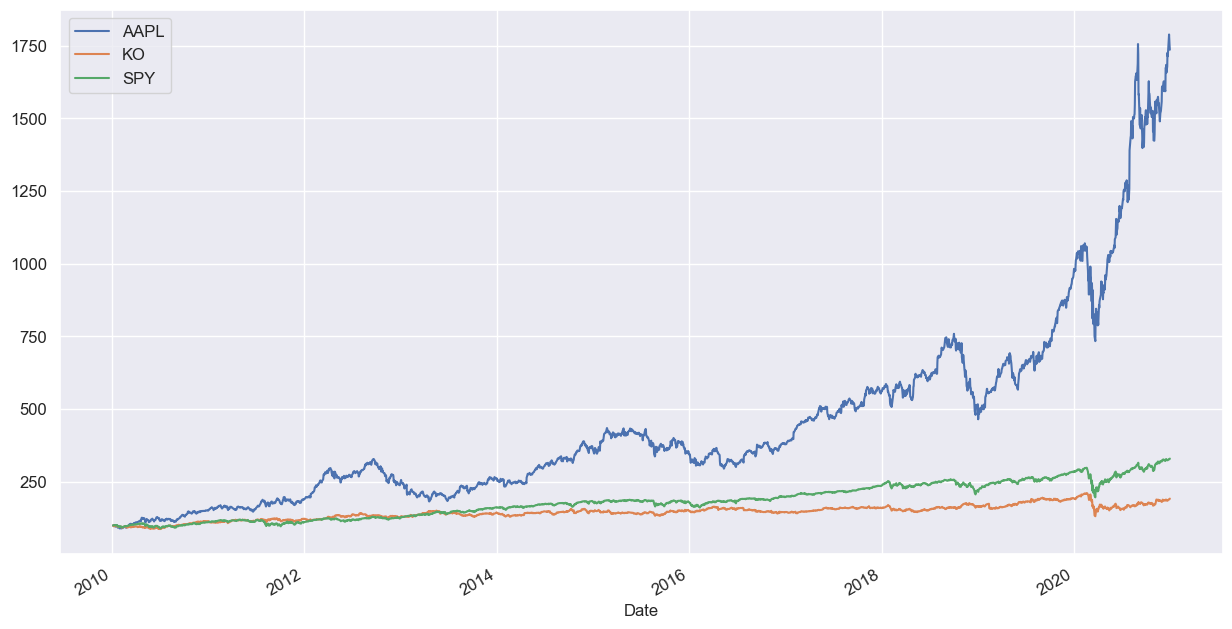

In [28]:
normClose.plot(figsize=(15,8), fontsize=12)
plt.legend(fontsize=12)
plt.show

# 3. Working with Data

In [29]:
# Create a data frame containing the close of AAPL
aapl = close.AAPL.copy().to_frame()
aapl

,AAPL
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714
...,...
2020-12-24,131.970001
2020-12-28,136.690002
2020-12-29,134.869995


In [30]:
# Let's say we need to calculate the increase and decrease from the previous day.
# One of the things we need to do before that is to learn the `shift` function,
# which shifts index by desired number of periods with an optional time `freq`.
aapl.shift() # appl.shift(preiod=1)

,AAPL
Date,
2010-01-04,NaN
2010-01-05,7.643214
2010-01-06,7.656429
2010-01-07,7.534643
2010-01-08,7.520714
...,...
2020-12-24,130.960007
2020-12-28,131.970001
2020-12-29,136.690002


In [31]:
aapl["lag1"]=aapl.shift()
aapl

,AAPL,lag1
Date,,
2010-01-04,7.643214,NaN
2010-01-05,7.656429,7.643214
2010-01-06,7.534643,7.656429
2010-01-07,7.520714,7.534643
2010-01-08,7.570714,7.520714
...,...,...
2020-12-24,131.970001,130.960007
2020-12-28,136.690002,131.970001
2020-12-29,134.869995,136.690002


In [32]:
# Subtract `aapl.AAPL` by `aapl.lag1`
aapl["Diff"] = aapl.AAPL.sub(aapl.lag1)
aapl

,AAPL,lag1,Diff
Date,,,
2010-01-04,7.643214,NaN,NaN
2010-01-05,7.656429,7.643214,0.013215
2010-01-06,7.534643,7.656429,-0.121786
2010-01-07,7.520714,7.534643,-0.013929
2010-01-08,7.570714,7.520714,0.050000
...,...,...,...
2020-12-24,131.970001,130.960007,1.009995
2020-12-28,136.690002,131.970001,4.720001
2020-12-29,134.869995,136.690002,-1.820007


In [33]:
aapl["% Change"] = aapl.AAPL.div(aapl.lag1)
aapl

,AAPL,lag1,Diff,% Change
Date,,,,
2010-01-04,7.643214,NaN,NaN,NaN
2010-01-05,7.656429,7.643214,0.013215,1.001729
2010-01-06,7.534643,7.656429,-0.121786,0.984094
2010-01-07,7.520714,7.534643,-0.013929,0.998151
2010-01-08,7.570714,7.520714,0.050000,1.006648
...,...,...,...,...
2020-12-24,131.970001,130.960007,1.009995,1.007712
2020-12-28,136.690002,131.970001,4.720001,1.035766
2020-12-29,134.869995,136.690002,-1.820007,0.986685


In [34]:
aapl["Diff2"] = aapl.AAPL.diff(periods=1)
aapl

,AAPL,lag1,Diff,% Change,Diff2
Date,,,,,
2010-01-04,7.643214,NaN,NaN,NaN,NaN
2010-01-05,7.656429,7.643214,0.013215,1.001729,0.013215
2010-01-06,7.534643,7.656429,-0.121786,0.984094,-0.121786
2010-01-07,7.520714,7.534643,-0.013929,0.998151,-0.013929
2010-01-08,7.570714,7.520714,0.050000,1.006648,0.050000
...,...,...,...,...,...
2020-12-24,131.970001,130.960007,1.009995,1.007712,1.009995
2020-12-28,136.690002,131.970001,4.720001,1.035766,4.720001
2020-12-29,134.869995,136.690002,-1.820007,0.986685,-1.820007


In [35]:
aapl["% Change 2"] = aapl.AAPL.pct_change(periods=1).mul(100)
aapl

,AAPL,lag1,Diff,% Change,Diff2,% Change 2
Date,,,,,,
2010-01-04,7.643214,NaN,NaN,NaN,NaN,NaN
2010-01-05,7.656429,7.643214,0.013215,1.001729,0.013215,0.172893
2010-01-06,7.534643,7.656429,-0.121786,0.984094,-0.121786,-1.590632
2010-01-07,7.520714,7.534643,-0.013929,0.998151,-0.013929,-0.184871
2010-01-08,7.570714,7.520714,0.050000,1.006648,0.050000,0.664833
...,...,...,...,...,...,...
2020-12-24,131.970001,130.960007,1.009995,1.007712,1.009995,0.771224
2020-12-28,136.690002,131.970001,4.720001,1.035766,4.720001,3.576571
2020-12-29,134.869995,136.690002,-1.820007,0.986685,-1.820007,-1.331485


In [36]:
aapl["% Change"] = aapl.AAPL.div(aapl.lag1).sub(1).mul(100)
aapl

,AAPL,lag1,Diff,% Change,Diff2,% Change 2
Date,,,,,,
2010-01-04,7.643214,NaN,NaN,NaN,NaN,NaN
2010-01-05,7.656429,7.643214,0.013215,0.172893,0.013215,0.172893
2010-01-06,7.534643,7.656429,-0.121786,-1.590632,-0.121786,-1.590632
2010-01-07,7.520714,7.534643,-0.013929,-0.184871,-0.013929,-0.184871
2010-01-08,7.570714,7.520714,0.050000,0.664833,0.050000,0.664833
...,...,...,...,...,...,...
2020-12-24,131.970001,130.960007,1.009995,0.771224,1.009995,0.771224
2020-12-28,136.690002,131.970001,4.720001,3.576571,4.720001,3.576571
2020-12-29,134.869995,136.690002,-1.820007,-1.331485,-1.820007,-1.331485


In [37]:
del aapl["lag1"]
del aapl["Diff"]
del aapl["Diff2"]
del aapl["% Change"]

In [38]:
aapl

,AAPL,% Change 2
Date,,
2010-01-04,7.643214,NaN
2010-01-05,7.656429,0.172893
2010-01-06,7.534643,-1.590632
2010-01-07,7.520714,-0.184871
2010-01-08,7.570714,0.664833
...,...,...
2020-12-24,131.970001,0.771224
2020-12-28,136.690002,3.576571
2020-12-29,134.869995,-1.331485


In [39]:
aapl.rename(columns = {"% Change 2": "Change"}, inplace = True)
aapl

,AAPL,Change
Date,,
2010-01-04,7.643214,NaN
2010-01-05,7.656429,0.172893
2010-01-06,7.534643,-1.590632
2010-01-07,7.520714,-0.184871
2010-01-08,7.570714,0.664833
...,...,...
2020-12-24,131.970001,0.771224
2020-12-28,136.690002,3.576571
2020-12-29,134.869995,-1.331485


In [40]:
# Convert the data into monthly data according to the last day of the month
aapl.AAPL.resample("M").last()

/var/folders/2_/k6x6sk7n2x3_gz81p2rjrbgh0000gn/T/ipykernel_63527/2200202204.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aapl.AAPL.resample("M").last()


Date
2010-01-31      6.859286
2010-02-28      7.307857
2010-03-31      8.392857
2010-04-30      9.324643
2010-05-31      9.174286
                 ...    
2020-08-31    129.039993
2020-09-30    115.809998
2020-10-31    108.860001
2020-11-30    119.050003
2020-12-31    132.690002
Freq: ME, Name: AAPL, Length: 132, dtype: float64

In [41]:
# Convert the data into monthly data according to the last business day of the month
aapl.AAPL.resample("BM").last().pct_change(periods=1).mul(100)

/var/folders/2_/k6x6sk7n2x3_gz81p2rjrbgh0000gn/T/ipykernel_63527/519559777.py:2: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  aapl.AAPL.resample("BM").last().pct_change(periods=1).mul(100)


Date
2010-01-29          NaN
2010-02-26     6.539620
2010-03-31    14.847028
2010-04-30    11.102138
2010-05-31    -1.612472
                ...    
2020-08-31    21.437974
2020-09-30   -10.252632
2020-10-30    -6.001206
2020-11-30     9.360649
2020-12-31    11.457370
Freq: BME, Name: AAPL, Length: 132, dtype: float64

# 4. The Mean, Variance, and Standard Deviation of Data

In [42]:
aapl

,AAPL,Change
Date,,
2010-01-04,7.643214,NaN
2010-01-05,7.656429,0.172893
2010-01-06,7.534643,-1.590632
2010-01-07,7.520714,-0.184871
2010-01-08,7.570714,0.664833
...,...,...
2020-12-24,131.970001,0.771224
2020-12-28,136.690002,3.576571
2020-12-29,134.869995,-1.331485


In [43]:
del aapl["Change"]

In [44]:
aapl

,AAPL
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714
...,...
2020-12-24,131.970001
2020-12-28,136.690002
2020-12-29,134.869995


In [45]:
ret = aapl.pct_change().dropna()
ret

,AAPL
Date,
2010-01-05,0.001729
2010-01-06,-0.015906
2010-01-07,-0.001849
2010-01-08,0.006648
2010-01-11,-0.008821
...,...
2020-12-24,0.007712
2020-12-28,0.035766
2020-12-29,-0.013315


In [46]:
ret.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2768 entries, 2010-01-05 to 2020-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2768 non-null   float64
dtypes: float64(1)
memory usage: 43.2 KB


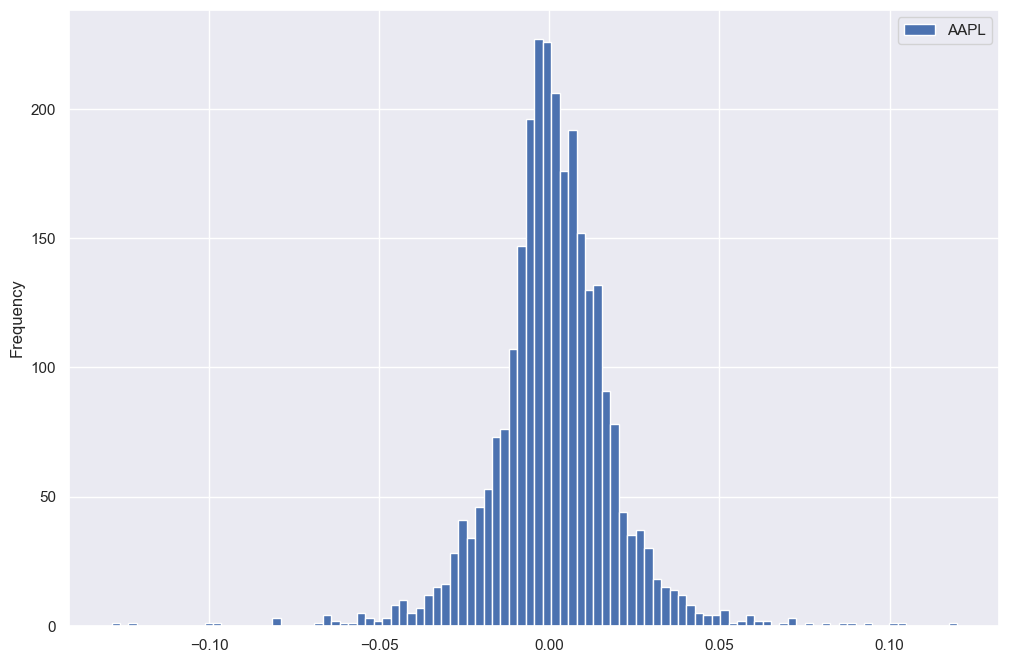

In [47]:
# Plotting a histogram for the rate of return
ret.plot(kind="hist",figsize=(12, 8), bins=100)
plt.show()

In [48]:
# Calculating the mean return
mean_daily_ret = ret.mean()
mean_daily_ret

AAPL    0.001191
dtype: float64

In [49]:
var_daily_ret = ret.var()
var_daily_ret

AAPL    0.000318
dtype: float64

In [50]:
std_daily_ret = np.sqrt(var_daily_ret)
std_daily_ret

AAPL    0.017843
dtype: float64

In [51]:
ret.std()

AAPL    0.017843
dtype: float64

In [52]:
mean_annual_ret = mean_daily_ret * 252
mean_annual_ret

AAPL    0.300134
dtype: float64

In [53]:
var_annual_ret = var_daily_ret * 252
var_annual_ret

AAPL    0.080226
dtype: float64

In [54]:
std_annual_ret = np.sqrt(var_annual_ret)
std_annual_ret

AAPL    0.283242
dtype: float64

In [55]:
ret.std() * np.sqrt(252)

AAPL    0.283242
dtype: float64

In [56]:
# Download stock data
ticker = ["SPY", "AAPL", "KO", "IBM", "DIS", "MSFT"]
stocks = yf.download(ticker, start='2010-01-01', end='2021-01-01')

# Select and normalize close columns
close = stocks.loc[:, "Close"].copy()
normClose = close.div(close.iloc[0]).mul(100)

normClose

[*********************100%%**********************]  6 of 6 completed


Ticker,AAPL,DIS,IBM,KO,MSFT,SPY
Date,,,,,,
2010-01-04,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2010-01-05,100.172893,99.750546,98.792000,98.790318,100.032305,100.264710
2010-01-06,98.579511,99.220455,98.150247,98.755261,99.418416,100.335302
2010-01-07,98.397266,99.251638,97.810499,98.509814,98.384491,100.758846
2010-01-08,99.051443,99.407544,98.792000,96.686537,99.063002,101.094148
...,...,...,...,...,...,...
2020-12-24,1726.629626,541.721227,94.141184,187.377271,719.709191,325.597806
2020-12-28,1788.383766,557.717500,94.239340,189.901820,726.849761,328.394959
2020-12-29,1764.571699,552.853149,93.469238,189.796635,724.232596,327.768451


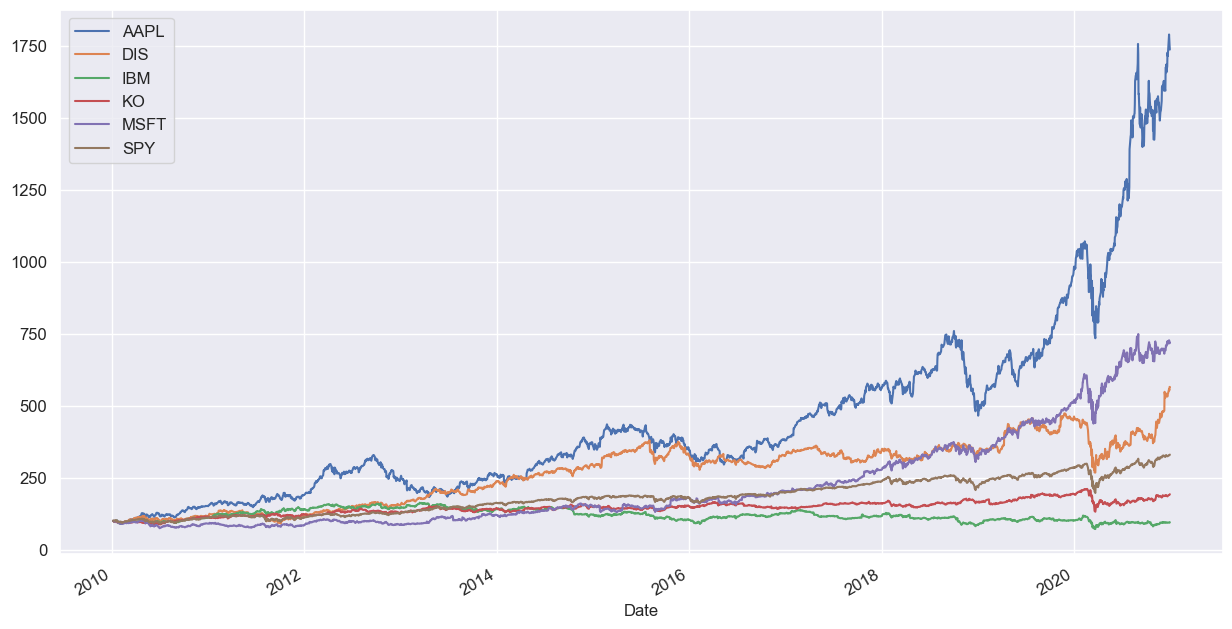

In [57]:
# Plot normalized data
normClose.plot(figsize=(15, 8), fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [58]:
ret = close.pct_change().dropna()
ret.head()

Ticker,AAPL,DIS,IBM,KO,MSFT,SPY
Date,,,,,,
2010-01-05,0.001729,-0.002495,-0.012080,-0.012097,0.000323,0.002647
2010-01-06,-0.015906,-0.005314,-0.006496,-0.000355,-0.006137,0.000704
2010-01-07,-0.001849,0.000314,-0.003462,-0.002485,-0.010400,0.004221
2010-01-08,0.006648,0.001571,0.010035,-0.018509,0.006897,0.003328
2010-01-11,-0.008821,-0.016311,-0.010470,0.020308,-0.012720,0.001397


In [59]:
ret.describe()

Ticker,AAPL,DIS,IBM,KO,MSFT,SPY
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,0.001191,0.000749,0.000082,0.000298,0.000841,0.000491
std,0.017843,0.015717,0.014132,0.011088,0.016012,0.010909
min,-0.128647,-0.129846,-0.128507,-0.096725,-0.147390,-0.109424
25%,-0.007123,-0.006210,-0.006321,-0.004698,-0.006939,-0.003532
50%,0.000903,0.000629,0.000287,0.000438,0.000654,0.000637
75%,0.010379,0.007901,0.006743,0.005706,0.008636,0.005421
max,0.119808,0.144123,0.113010,0.064796,0.142169,0.090603


In [60]:
ret.describe().T

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
AAPL,2768.0,0.001191,0.017843,-0.128647,-0.007123,0.000903,0.010379,0.119808
DIS,2768.0,0.000749,0.015717,-0.129846,-0.006210,0.000629,0.007901,0.144123
IBM,2768.0,0.000082,0.014132,-0.128507,-0.006321,0.000287,0.006743,0.113010
KO,2768.0,0.000298,0.011088,-0.096725,-0.004698,0.000438,0.005706,0.064796
MSFT,2768.0,0.000841,0.016012,-0.147390,-0.006939,0.000654,0.008636,0.142169
SPY,2768.0,0.000491,0.010909,-0.109424,-0.003532,0.000637,0.005421,0.090603


In [61]:
summary = ret.describe().T.loc[:, ["mean", "std"]]
summary

,mean,std
Ticker,,
AAPL,0.001191,0.017843
DIS,0.000749,0.015717
IBM,0.000082,0.014132
KO,0.000298,0.011088
MSFT,0.000841,0.016012
SPY,0.000491,0.010909


In [62]:
summary["mean"] = summary["mean"] * 252
summary["std"] = summary["std"] * np.sqrt(252)
summary

,mean,std
Ticker,,
AAPL,0.300134,0.283242
DIS,0.188696,0.249504
IBM,0.020648,0.224345
KO,0.075091,0.176009
MSFT,0.211915,0.254185
SPY,0.123754,0.173170


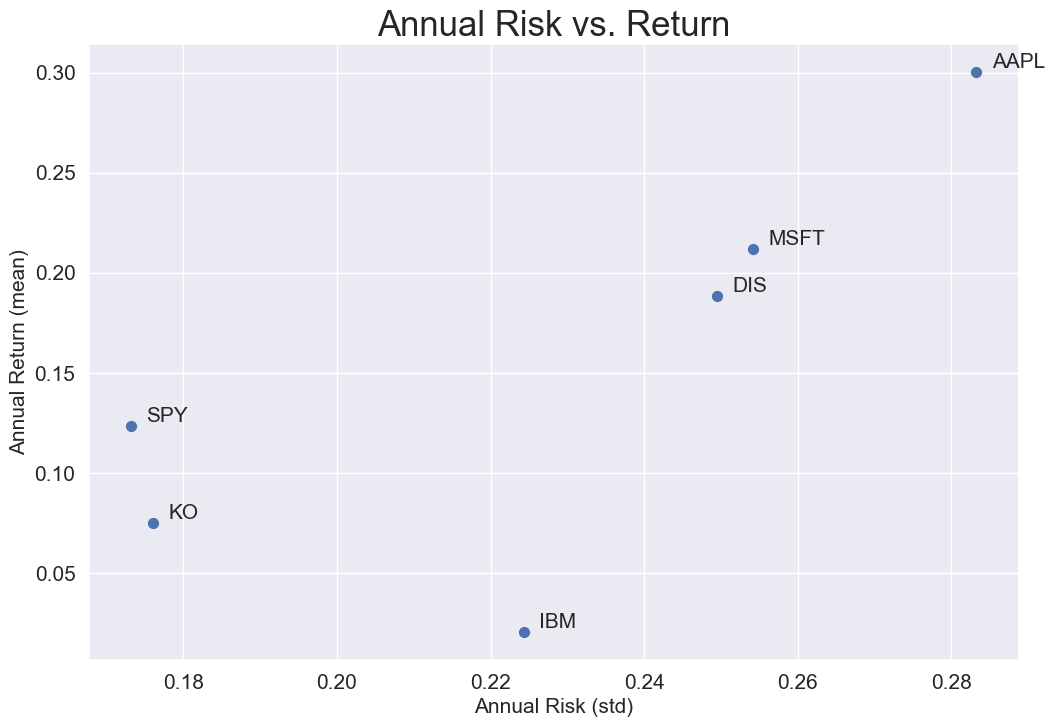

In [63]:
summary.plot.scatter(x="std", y="mean", figsize=[12,8], s=50, fontsize=15)
for i in summary.index:
    plt.annotate(i, xy=[summary.loc[i,"std"]+0.002, summary.loc[i,"mean"]+0.002], size=15)
plt.xlabel("Annual Risk (std)", fontsize = 15)
plt.ylabel("Annual Return (mean)", fontsize = 15)
plt.title("Annual Risk vs. Return", fontsize = 25)
plt.show()

# 5. Correlation and Covariance

In [64]:
ret

Ticker,AAPL,DIS,IBM,KO,MSFT,SPY
Date,,,,,,
2010-01-05,0.001729,-0.002495,-0.012080,-0.012097,0.000323,0.002647
2010-01-06,-0.015906,-0.005314,-0.006496,-0.000355,-0.006137,0.000704
2010-01-07,-0.001849,0.000314,-0.003462,-0.002485,-0.010400,0.004221
2010-01-08,0.006648,0.001571,0.010035,-0.018509,0.006897,0.003328
2010-01-11,-0.008821,-0.016311,-0.010470,0.020308,-0.012720,0.001397
...,...,...,...,...,...,...
2020-12-24,0.007712,0.001037,0.006376,0.006782,0.007827,0.003890
2020-12-28,0.035766,0.029529,0.001043,0.013473,0.009921,0.008591
2020-12-29,-0.013315,-0.008722,-0.008172,-0.000554,-0.003601,-0.001908


In [65]:
ret.cov()

Ticker,AAPL,DIS,IBM,KO,MSFT,SPY
Ticker,,,,,,
AAPL,0.000318,0.000115,0.000110,0.000067,0.000158,0.000128
DIS,0.000115,0.000247,0.000111,0.000085,0.000121,0.000121
IBM,0.000110,0.000111,0.000200,0.000079,0.000121,0.000108
KO,0.000067,0.000085,0.000079,0.000123,0.000076,0.000077
MSFT,0.000158,0.000121,0.000121,0.000076,0.000256,0.000130
SPY,0.000128,0.000121,0.000108,0.000077,0.000130,0.000119


In [66]:
ret.corr()

Ticker,AAPL,DIS,IBM,KO,MSFT,SPY
Ticker,,,,,,
AAPL,1.000000,0.408513,0.436100,0.339213,0.554051,0.659557
DIS,0.408513,1.000000,0.497775,0.486514,0.480457,0.706726
IBM,0.436100,0.497775,1.000000,0.502436,0.533130,0.703342
KO,0.339213,0.486514,0.502436,1.000000,0.429749,0.639324
MSFT,0.554051,0.480457,0.533130,0.429749,1.000000,0.744601
SPY,0.659557,0.706726,0.703342,0.639324,0.744601,1.000000


In [67]:
import seaborn as sns

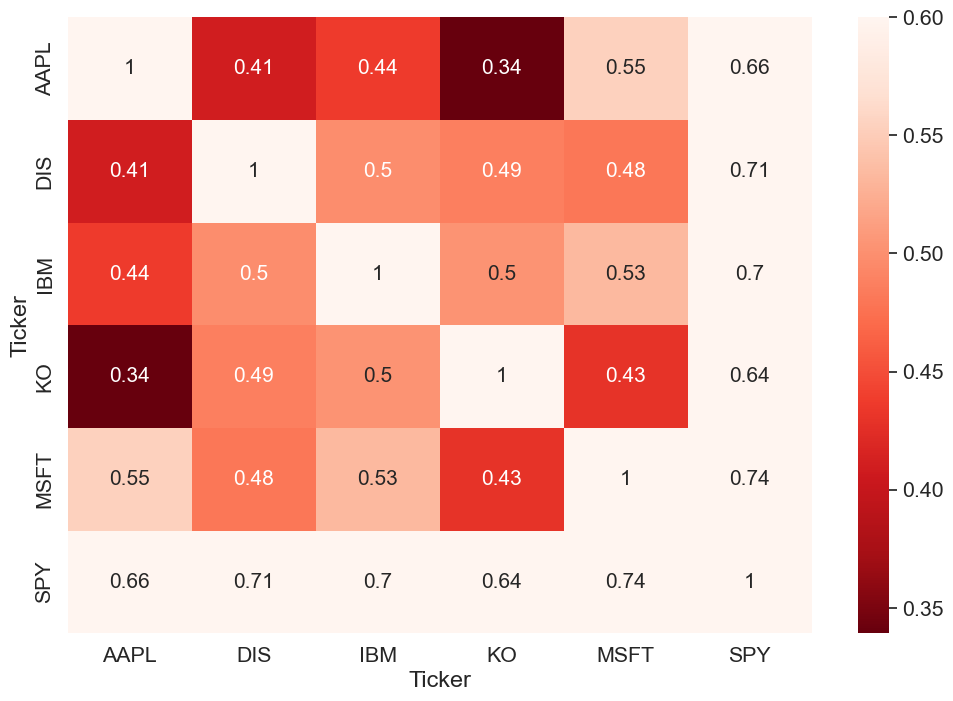

In [68]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.4)
sns.heatmap(ret.corr(), cmap="Reds_r", annot=True, annot_kws={"size":15}, vmax=0.6)
plt.show()

# Challenge 1
### Download 20 random stocks and:
### 1. Calculate risk and reward potential
### 2. Comopare the covariance and correlation
### 3. Find the best 5 to invest in in the long term

In [69]:
import random
import yfinance as yf
import pandas as pd

# Sample list of stock tickers
all_tickers = [
    "AAPL", "MSFT", "GOOGL", "AMZN", "META", "TSLA", "BRK-B", "JNJ", "V", "WMT",
    "JPM", "PG", "MA", "NVDA", "HD", "DIS", "PYPL", "BAC", "VZ", "NFLX",
    "ADBE", "CMCSA", "INTC", "PFE", "KO", "MRK", "PEP", "T", "ABBV", "CSCO",
    "XOM", "ABT", "CRM", "NKE", "LLY", "ORCL", "MCD", "NEE", "TMO", "QCOM",
    "ACN", "MDT", "DHR", "TXN", "UNH", "LIN", "UNP", "HON"
]

# Ensure the list has more than 20 tickers for randomness
assert len(all_tickers) > 20, "List of all tickers must be greater than 20"

# Check if ticker is valid
def ticker_is_valid(ticker):
    try:
        data = yf.download(ticker, start='2010-01-01', end='2024-01-01', progress=False)
        return not data.empty
    except:
        return False

valid_tickers = [ticker for ticker in all_tickers if ticker_is_valid(ticker)]
print(f"Number of valid tickers: {len(valid_tickers)}")

# Randomly select 20 tickers
selected_tickers = random.sample(valid_tickers, 20)
print("Selected Tickers:", selected_tickers)

# Download the stock data for the selected tickers
stocks = yf.download(selected_tickers, start='2010-01-01', end='2024-01-01')
stocks

[************          25%%                      ]  5 of 20 completed

Number of valid tickers: 48
Selected Tickers: ['HD', 'MDT', 'CRM', 'MSFT', 'TMO', 'ACN', 'ABBV', 'INTC', 'T', 'TXN', 'AAPL', 'BAC', 'PG', 'JPM', 'BRK-B', 'WMT', 'PFE', 'HON', 'LLY', 'XOM']


[*********************100%%**********************]  20 of 20 completed


Price        Adj Close                                                 \
Ticker            AAPL        ABBV         ACN        BAC       BRK-B   
Date                                                                    
2010-01-04    6.461977         NaN   32.212463  12.601926   66.220001   
2010-01-05    6.473148         NaN   32.411533  13.011547   66.540001   
2010-01-06    6.370184         NaN   32.756100  13.164152   66.199997   
2010-01-07    6.358408         NaN   32.725475  13.597869   66.459999   
2010-01-08    6.400681         NaN   32.595303  13.477393   66.440002   
...                ...         ...         ...        ...         ...   
2023-12-22  193.091385  152.053635  351.798248  32.995476  356.470001   
2023-12-26  192.542816  151.739594  350.785828  33.419884  356.829987   
2023-12-27  192.642548  151.994751  351.172943  33.400146  356.950012   
2023-12-28  193.071426  151.867172  348.959625  33.439629  357.570007   
2023-12-29  192.024185  152.083069  348.284729  33.232349  356.660004   

Price                                                                  ...  \
Ticker             CRM          HD         HON       INTC         JPM  ...   
Date                                                                   ...   
2010-01-04   18.680597   20.287859   28.019489  13.605184   29.497787  ...   
2010-01-05   18.600702   20.436459   28.075052  13.598669   30.069147  ...   
2010-01-06   18.568245   20.365698   28.075052  13.553060   30.234381  ...   
2010-01-07   18.485853   20.606297   28.616688  13.422748   30.833263  ...   
2010-01-08   18.513317   20.507223   29.248604  13.572606   30.757538  ...   
...                ...         ...         ...        ...         ...  ...   
2023-12-22  265.992523  344.125244  203.438751  47.666107  165.409225  ...   
2023-12-26  265.872711  344.836029  205.813065  50.148720  166.387451  ...   
2023-12-27  266.372040  344.066010  206.782593  50.406910  167.385437  ...   
2023-12-28  265.233521  342.910980  206.930969  50.039482  168.274734  ...   
2023-12-29  262.796722  342.111359  207.465195  49.900455  168.077118  ...   

Price        Volume                                                           \
Ticker          LLY      MDT      MSFT       PFE       PG         T      TMO   
Date                                                                           
2010-01-04  6067100  6109400  38409100  54898644  9190800  38576858  7182800   
2010-01-05  7517100  6568600  49749600  45714931  8649400  46650478  3221900   
2010-01-06  7661600  7470700  58182400  43640975  9908400  50172450  3065000   
2010-01-07  5997100  6895200  50559700  41557112  8972800  44486797  2638300   
2010-01-08  5624400  4947200  51197400  32049716  8464600  36586622  3162200   
...             ...      ...       ...       ...      ...       ...      ...   
2023-12-22  2225600  3426000  17091100  35087200  4412800  26736000  1081500   
2023-12-26  1678700  2954800  12673100  30119100  3634900  22750400   639100   
2023-12-27  2163400  4041700  14905400  35000700  4569400  27728700   806000   
2023-12-28  1973500  3297000  14327000  30472900  5023000  32112900   763400   
2023-12-29  1998000  3846900  18723000  30342500  5300900  33271100   804300   

Price                                     
Ticker           TXN       WMT       XOM  
Date                                      
2010-01-04  10369300  62259300  27809100  
2010-01-05  10943800  46945200  30174700  
2010-01-06   8933800  37551600  35044700  
2010-01-07  10775400  31988100  27192100  
2010-01-08  12875600  34089600  24891800  
...              ...       ...       ...  
2023-12-22   3492400  19405500  12921800  
2023-12-26   3202200  11679900  16835100  
2023-12-27   3264900  19896000  14558800  
2023-12-28   3023000  16776000  16329300  
2023-12-29   2920600  21948300  17741400  

[3522 rows x 120 columns]

In [70]:
close = stocks.loc[:, "Close"].copy()
normClose = close.div(close.iloc[0]).mul(100)
normClose

Ticker,AAPL,ABBV,ACN,BAC,BRK-B,CRM,HD,HON,INTC,JPM,LLY,MDT,MSFT,PFE,PG,T,TMO,TXN,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,
2010-01-04,100.000000,NaN,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2010-01-05,100.172893,NaN,100.618023,103.250486,100.483237,99.572307,100.732470,100.198269,99.952115,101.936994,98.241203,102.050109,100.032305,98.573695,100.032723,99.510150,100.336842,99.423300,99.004240,100.390451
2010-01-06,98.579511,NaN,101.687661,104.461439,99.969791,99.398561,100.383678,100.198269,99.616859,102.497082,98.967060,103.257404,99.418416,98.256734,99.558245,96.606012,101.284212,98.692810,98.782955,101.258127
2010-01-07,98.397266,NaN,101.592589,107.903128,100.362425,98.957500,101.569588,102.131348,98.659010,104.527427,98.464547,104.214119,98.384491,97.886950,99.018327,95.521340,101.284212,99.000384,98.838276,100.939988
2010-01-08,99.051443,NaN,101.188495,106.947107,100.332228,99.104520,101.081268,104.386621,99.760540,104.270716,97.710777,104.760820,99.063002,98.679342,98.887434,94.821555,102.989470,101.268742,98.340396,100.535062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,2532.965849,NaN,842.524399,213.065655,538.311680,1423.897340,1215.870232,534.567796,229.885067,390.665111,1592.378614,186.605912,1210.274563,158.127838,237.696337,76.669693,1113.789448,646.828158,288.862238,147.375273
2023-12-26,2525.769884,NaN,840.099822,215.806256,538.855301,1423.255826,1218.381572,540.806658,241.858247,392.975508,1593.160212,187.471527,1210.533100,158.183519,238.776186,76.762347,1115.157920,656.708943,288.419669,147.707877
2023-12-27,2527.078114,NaN,841.026884,215.678783,539.036553,1425.928908,1215.660962,543.354228,243.103450,395.332555,1623.422710,187.744864,1208.626811,159.297099,238.972513,76.808674,1119.263209,658.323699,291.130355,147.013740


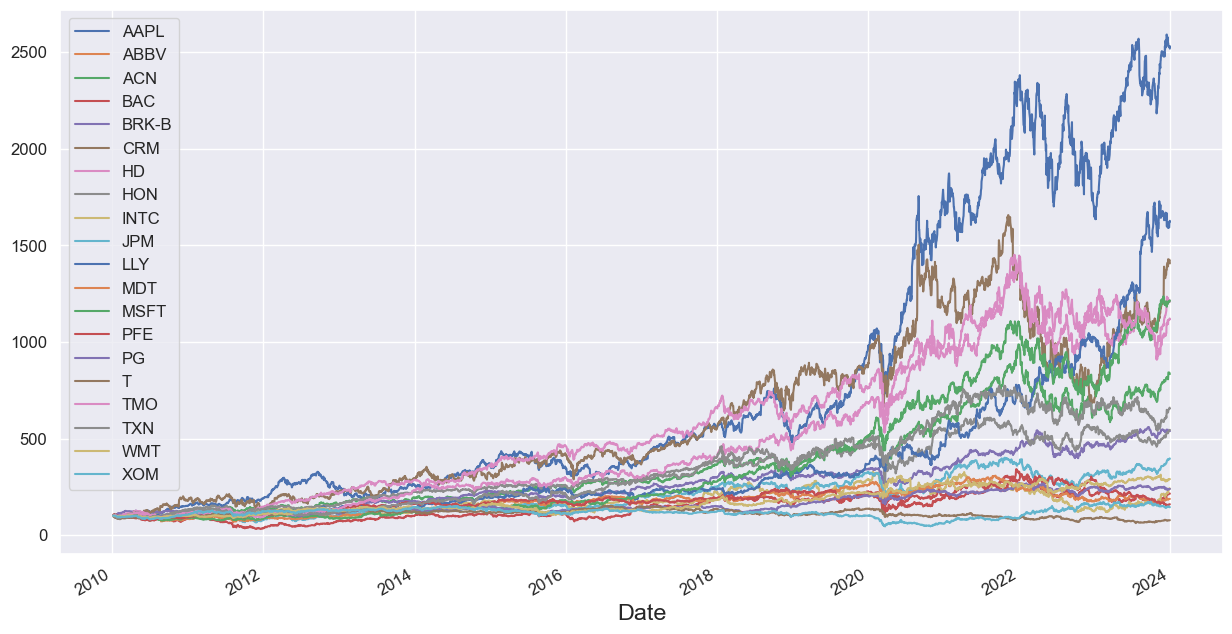

In [71]:
# Plot normalized data
normClose.plot(figsize=(15, 8), fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [72]:
# Initiate ret
ret = close.pct_change().dropna()
ret.describe()

Ticker,AAPL,ABBV,ACN,BAC,BRK-B,CRM,HD,HON,INTC,JPM,LLY,MDT,MSFT,PFE,PG,T,TMO,TXN,WMT,XOM
count,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000
mean,0.000986,0.000679,0.000700,0.000555,0.000556,0.000890,0.000725,0.000539,0.000508,0.000621,0.001024,0.000345,0.001087,0.000155,0.000336,-0.000069,0.000875,0.000746,0.000378,0.000185
std,0.017887,0.016808,0.015021,0.019162,0.011882,0.021690,0.014850,0.013949,0.019924,0.016604,0.016394,0.014131,0.016932,0.014006,0.011442,0.013812,0.015217,0.017000,0.012712,0.016840
min,-0.128647,-0.162524,-0.102967,-0.153973,-0.095921,-0.158885,-0.197938,-0.120868,-0.180415,-0.149649,-0.105145,-0.128237,-0.147390,-0.077346,-0.087373,-0.104061,-0.082875,-0.118257,-0.113757,-0.122248
25%,-0.007427,-0.007307,-0.006219,-0.009017,-0.005256,-0.009110,-0.006043,-0.005695,-0.008600,-0.007237,-0.006740,-0.006151,-0.006728,-0.006691,-0.005064,-0.006299,-0.006947,-0.007729,-0.005402,-0.007794
50%,0.000855,0.001173,0.001105,0.000324,0.000484,0.000912,0.000956,0.000776,0.000621,0.000478,0.000839,0.000557,0.000828,0.000000,0.000479,0.000418,0.001011,0.001212,0.000429,-0.000095
75%,0.010185,0.008935,0.007942,0.010181,0.006433,0.011636,0.007953,0.007232,0.009846,0.008405,0.008403,0.007534,0.009573,0.006950,0.005973,0.006566,0.008603,0.009878,0.006362,0.008042
max,0.119808,0.137673,0.128573,0.177962,0.116099,0.260449,0.137508,0.150684,0.195213,0.180125,0.156798,0.101892,0.142169,0.108552,0.120090,0.100223,0.104700,0.135294,0.117085,0.126868


In [73]:
# Collect mean and standard deviation
summary = ret.describe().T.loc[:,["mean","std"]]
summary

,mean,std
Ticker,,
AAPL,0.000986,0.017887
ABBV,0.000679,0.016808
ACN,0.000700,0.015021
BAC,0.000555,0.019162
BRK-B,0.000556,0.011882
CRM,0.000890,0.021690
HD,0.000725,0.014850
HON,0.000539,0.013949
INTC,0.000508,0.019924


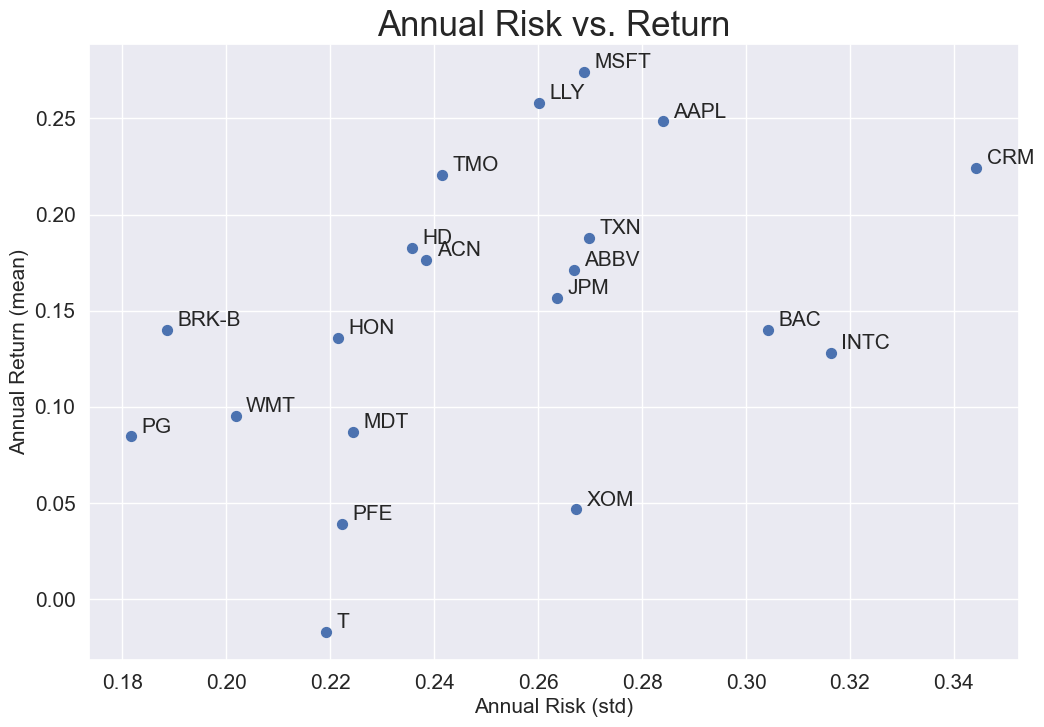

In [74]:
summary["annual_mean"] = summary["mean"] * 252
summary["annual_std"] = summary["std"] * np.sqrt(252)

summary.plot.scatter(x="annual_std", y="annual_mean", figsize=[12,8], s=50, fontsize=15)
for i in summary.index:
    plt.annotate(i, xy=[summary.loc[i,"annual_std"]+0.002, summary.loc[i,"annual_mean"]+0.002], size=15)
plt.xlabel("Annual Risk (std)", fontsize = 15)
plt.ylabel("Annual Return (mean)", fontsize = 15)
plt.title("Annual Risk vs. Return", fontsize = 25)
plt.show()

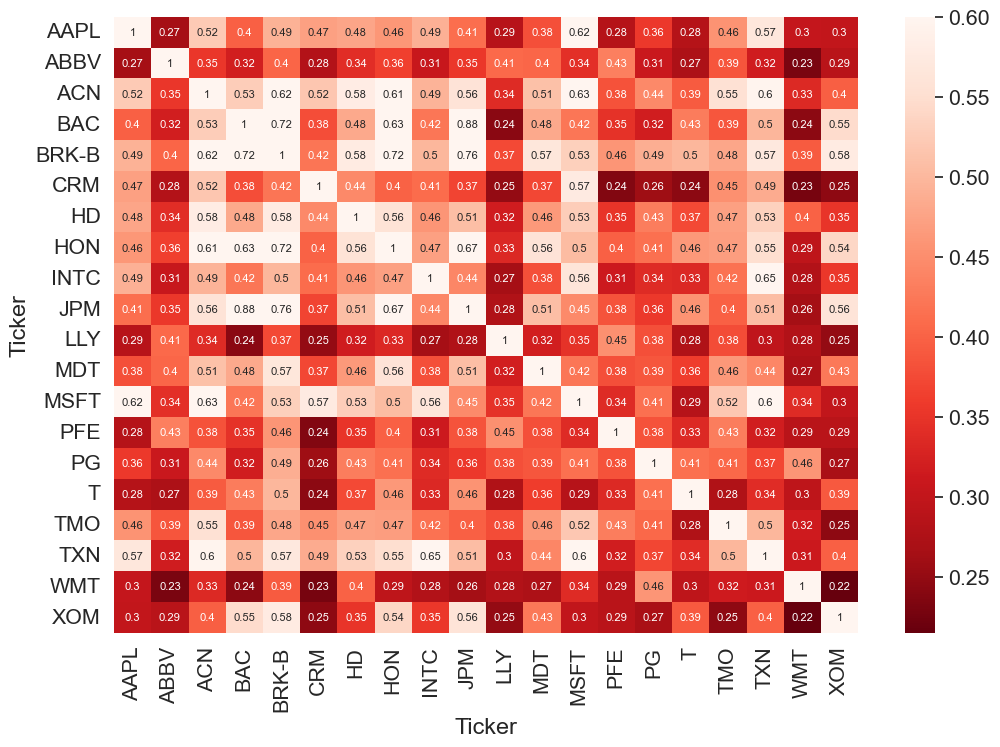

In [75]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.set(font_scale=1.4)
sns.heatmap(ret.corr(), cmap="Reds_r", annot=True, annot_kws={"size":8}, vmax=0.6)
plt.show()

In [76]:
summary['ret_risk_index'] = summary.annual_mean.div(summary.annual_std)
summary = summary.sort_values(by=['ret_risk_index'], ascending=False)
summary

,mean,std,annual_mean,annual_std,ret_risk_index
Ticker,,,,,
MSFT,0.001087,0.016932,0.274033,0.268788,1.019513
LLY,0.001024,0.016394,0.258165,0.260246,0.992003
TMO,0.000875,0.015217,0.220485,0.241559,0.912758
AAPL,0.000986,0.017887,0.248502,0.283940,0.875193
HD,0.000725,0.014850,0.182688,0.235732,0.774981
BRK-B,0.000556,0.011882,0.140042,0.188615,0.742476
ACN,0.000700,0.015021,0.176495,0.238450,0.740173
TXN,0.000746,0.017000,0.187905,0.269864,0.696296
CRM,0.000890,0.021690,0.224353,0.344325,0.651571


### Determining which stocks to invest in:
Risk-Return Tradeoff: The plot you've created shows the annualized risk (standard deviation) versus the annualized return (mean) for different stocks. In general, investors seek a balance between risk and return. You can use the following approaches to make investment decisions:
* Efficient Frontier: Identify stocks that lie on the efficient frontier, which offers the highest expected return for a given level of risk.
* Sharpe Ratio: Calculate the Sharpe ratio for each stock to measure the return per unit of risk. The ratio is defined as: (Annual Return of the Stock - Risk-Free Rate) / (Annual Risk)

Diversification
* Portfolio Diversification: Diversify your investments across multiple stocks to reduce unsystematic risk. You can create a portfolio of stocks that have low correlations with each other to achieve diversification benefits.


The Sharpe Ratio does take into account the absolute value of the return, but it does so in a way that adjusts for risk. It measures the excess return (return above the risk-free rate) per unit of risk (standard deviation). However, it does not explicitly prioritize the magnitude of the return independently of risk.

The risk-free rate is typically derived from the yield on government securities, such as U.S. Treasury bills (T-bills), notes, or bonds, which are considered virtually free of credit risk. In practice, the 3-month U.S. Treasury bill yield is often used as a proxy for the risk-free rate.

To account for both the magnitude of return and the return-risk ratio, you might consider additional or complementary metrics, such as the Sortino Ratio.

In [77]:
import numpy as np

# Assume a risk-free rate (e.g., 3-month Treasury bill rate)
risk_free_rate = 0.02

# Calculate the Sharpe Ratio
summary['sharpe_ratio'] = (summary['annual_mean'] - risk_free_rate) / summary['annual_std']

# Display the dataframe with Sharpe Ratio
summary

# Sort stocks by Sharpe Ratio in descending order
summary_sorted = summary.sort_values(by="sharpe_ratio", ascending=False)

# Locate Top 5 Stocks
# Display the top stocks based on Sharpe Ratio
print("Top Stocks based on Sharpe Ratio:")
for ticker in summary_sorted.head().index:
    print(ticker)

Top Stocks based on Sharpe Ratio:
MSFT
LLY
TMO
AAPL
HD


# 6. Simple Return and Log Return
Simple return, also known as arithmetic return, measures the percentage change in the price of an asset over a specific period. It is calculated as the difference between the ending price and the starting price, divided by the starting price. Simple return is a straightforward way to assess the performance of an investment over a particular period.

Log return, also known as logarithmic return or continuously compounded return, measures the logarithm of the ratio of the ending price to the starting price. Log returns are additive over time, which simplifies the calculation of returns over multiple periods. This property makes log returns particularly useful in financial modeling and time series analysis.

In [78]:
# Create a random dataframe
df = pd.DataFrame(index=[2016, 2017, 2018], data=[100, 50, 95], columns=["Price"])
df

,Price
2016,100
2017,50
2018,95


In [79]:
# Simple Returns
simpleReturns = df.pct_change().dropna()
simpleReturns

,Price
2017,-0.5
2018,0.9


In [80]:
# Find the mean simple return
meanRet = simpleReturns.mean()
meanRet

Price    0.2
dtype: float64

In [81]:
# Since the mean simple return is 0.2, the following should equal 95
df.loc[2016, "Price"] * (1 + meanRet) ** 2

# However, the code returns 144, which is not equal to 95.
# From This result, we learn that simple or arithmetic return is not cumulative.

Price    144.0
dtype: float64

In [82]:
# This is where log return comes into perspective
logReturns = np.log(df / df.shift()).dropna()
logReturns

,Price
2017,-0.693147
2018,0.641854


In [83]:
meanLogRet = logReturns.mean()
meanLogRet

Price   -0.025647
dtype: float64

In [84]:
100 ** meanLogRet

Price    0.888601
dtype: float64

In [85]:
# From the following computation, we learn that log return is cumulative
df.loc[2016, "Price"] * np.exp(meanLogRet * 2)

Price    95.0
dtype: float64

# 7. Creating Moving Averages with Rolling Functions
To roll a function means to apply a calculation across a moving or sliding window of data points within a
dataset. This involves taking a fixed-size subset (window) of consecutive data points, performing a
specified function on this subset, and then moving the window one data point forward and repeating.

Rolling a dataset offers several benefits over applying functions to individual data points, especially when dealing with time series data.

1. Smoothing Data
* Reduced Noise: Rolling calculations, like rolling means, help smooth out short-term fluctuations and random noise in the data. This makes it easier to identify long-term trends and underlying patterns.
* Signal Clarity: By averaging or summing over a window, the true signal in the data becomes clearer, making it easier to analyze and interpret.

2. Trend Detection
* Trend Analysis: Rolling functions are excellent for detecting trends over time. For example, a rolling mean can highlight the overall direction of a time series, helping to identify upward or downward trends.
* Cyclic Patterns: Rolling calculations can reveal cyclic patterns, such as seasonal variations or business cycles, which might not be apparent from individual data points.

3. Anomaly Detection
- Outlier Detection: By comparing rolling statistics (like rolling standard deviation) to individual data points, anomalies or outliers can be identified more effectively. THis is useful in quality control, finance, and other fields where anomalies are significant.
- Behavioral Insights: Rolling functions cna help detect unusual behavior over time, providing insights into potential issues or areas needing attention.

4. Contextual Analysis
* Contextual Understanding: Rolling functions provide a context for each data point by considering its neighboring values. This contextual analysis is crucial for understanding how data points relate to each other over time.
* Better Decision Making: By looking at a window of data, rather than isolated points, decisions can be made based on a broader understanding of the data's behavior.

5. Data Aggregation
* Aggregated Insights: Rolling calculations aggregate data over a specified window, providing insights that individual data points cannot. For instance, rolling sums can show cumulative sales over a perfiod, offering a better view of overall performance.
* Simplified Data: Aggregating data through rolling functions simplifies complex datasets, making them easier to analyze and visualize.

6. Robustness to Variability
* Handling Volatility: In volatile datasets, such as stock prices, rolling functions help manage variability by focusing on a window of data rather than isolated points. This results in more stable and reliable insights.
* Adaptability: Rolling functions adapt to changes in data patterns, making them userful in dynamic environments where data characteristics may shift over time.

In [86]:
SPY = yf.download("SPY")

[*********************100%%**********************]  1 of 1 completed


In [87]:
spy = SPY.Close.to_frame()
spy

,Close
Date,
1993-01-29,43.937500
1993-02-01,44.250000
1993-02-02,44.343750
1993-02-03,44.812500
1993-02-04,45.000000
...,...
2024-06-03,527.799988
2024-06-04,528.390015
2024-06-05,534.669983


<function matplotlib.pyplot.show(close=None, block=None)>

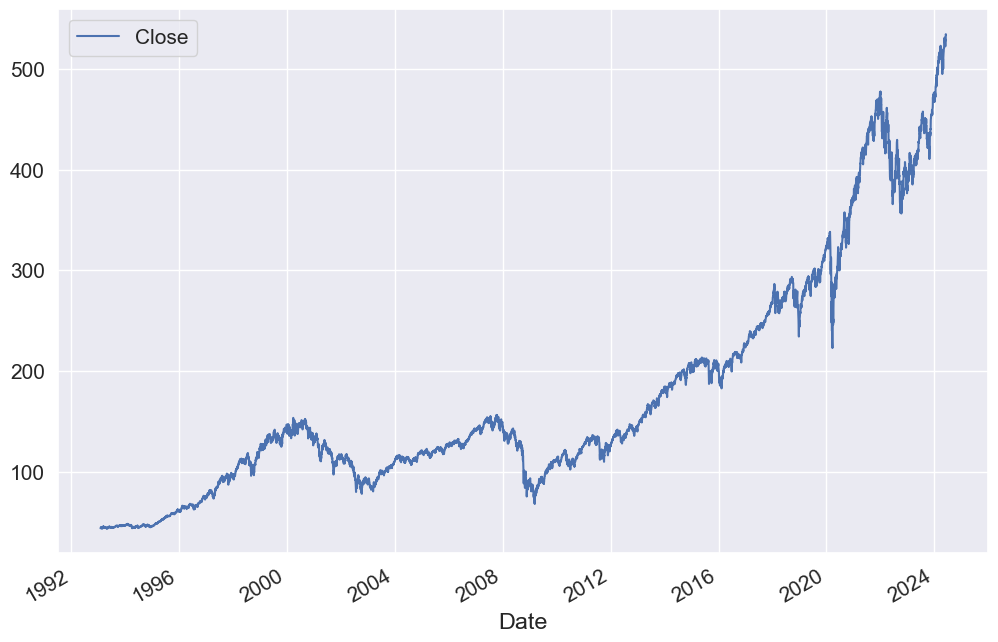

In [88]:
spy.plot(figsize=(12,8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.show

In [89]:
spy_roll = spy.rolling(window=10)
spy_roll = spy_roll.mean()

In [90]:
spy_roll.head(15)

,Close
Date,
1993-01-29,NaN
1993-02-01,NaN
1993-02-02,NaN
1993-02-03,NaN
1993-02-04,NaN
1993-02-05,NaN
1993-02-08,NaN
1993-02-09,NaN
1993-02-10,NaN


In [91]:
spy.rolling(window=10).median()

,Close
Date,
1993-01-29,NaN
1993-02-01,NaN
1993-02-02,NaN
1993-02-03,NaN
1993-02-04,NaN
...,...
2024-06-03,528.619995
2024-06-04,528.095001
2024-06-05,528.095001


In [92]:
spy.rolling(window=10).max()

,Close
Date,
1993-01-29,NaN
1993-02-01,NaN
1993-02-02,NaN
1993-02-03,NaN
1993-02-04,NaN
...,...
2024-06-03,531.359985
2024-06-04,531.359985
2024-06-05,534.669983


In [93]:
# With `min_periods=`, we can set minimum number of values to start calculating
spy.rolling(window=10, min_periods=5).max()

,Close
Date,
1993-01-29,NaN
1993-02-01,NaN
1993-02-02,NaN
1993-02-03,NaN
1993-02-04,45.000000
...,...
2024-06-03,531.359985
2024-06-04,531.359985
2024-06-05,534.669983


In [94]:
SPY = yf.download("SPY")
spy = SPY.Close.to_frame()
spy["SMA50"] = spy.rolling(window=50, min_periods=50).mean()
spy.head()

[*********************100%%**********************]  1 of 1 completed


,Close,SMA50
Date,,
1993-01-29,43.93750,NaN
1993-02-01,44.25000,NaN
1993-02-02,44.34375,NaN
1993-02-03,44.81250,NaN
1993-02-04,45.00000,NaN


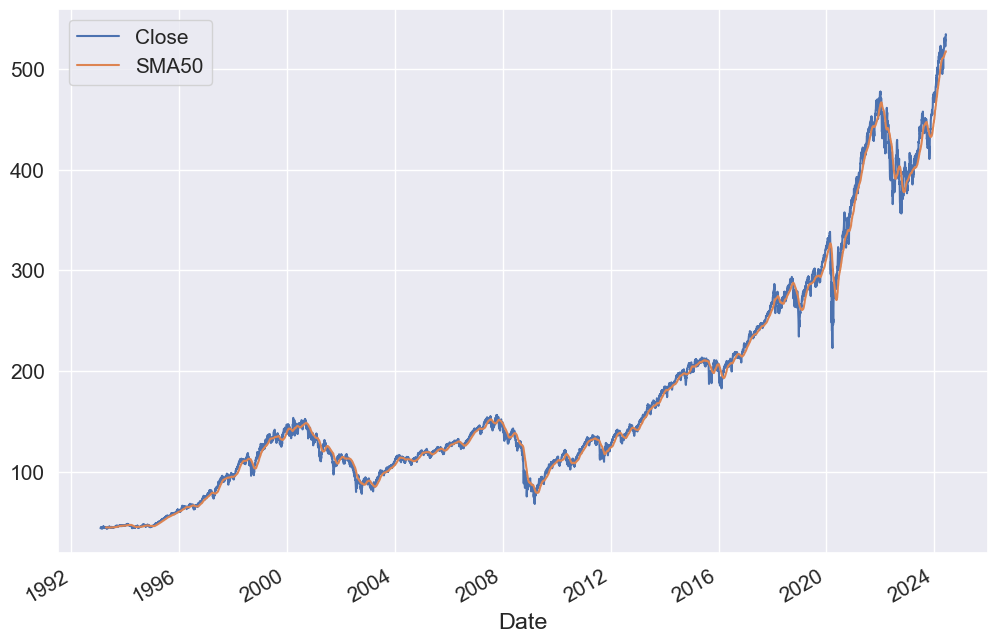

In [95]:
spy.plot(figsize=(12,8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.show()

In [96]:
spy["SMA200"] = spy.Close.rolling(window=200, min_periods=200).mean()
spy

,Close,SMA50,SMA200
Date,,,
1993-01-29,43.937500,NaN,NaN
1993-02-01,44.250000,NaN,NaN
1993-02-02,44.343750,NaN,NaN
1993-02-03,44.812500,NaN,NaN
1993-02-04,45.000000,NaN,NaN
...,...,...,...
2024-06-03,527.799988,516.755600,476.634401
2024-06-04,528.390015,516.899200,477.094901
2024-06-05,534.669983,517.197199,477.585751


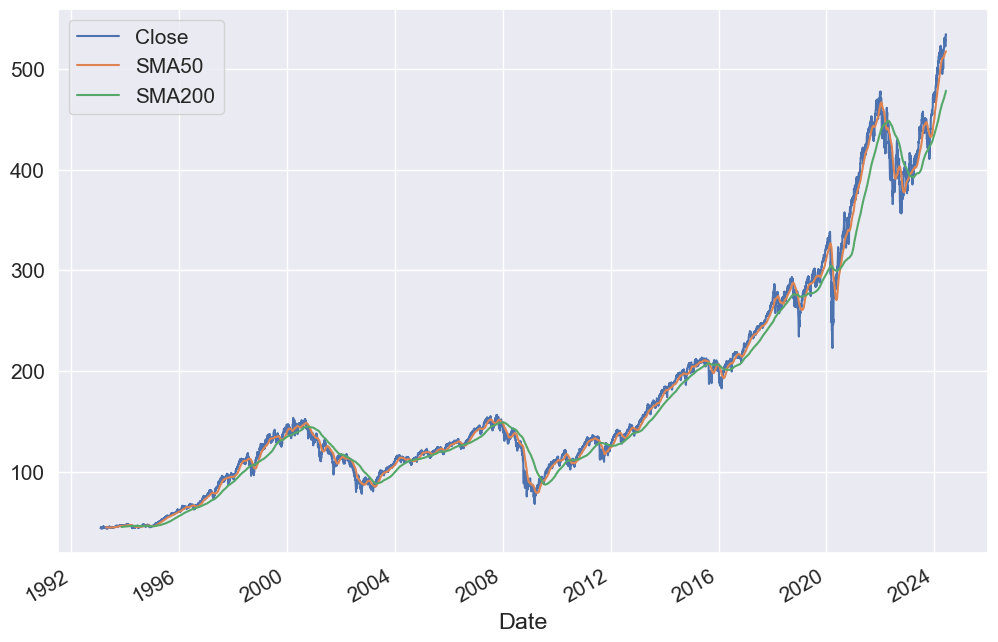

In [97]:
spy.plot(figsize=(12,8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.show()

### Why Roll the Data?
By calculating the rolling averages of the `Close` column of the SPY data, we have created and plotted the `Simple Moving Average (SMA)` of the data, which visualizes the trend within the data set immune to short-term volatility, enabling us to draw conclusions from the long-term perspective.